#Customer Churn Analysis_Project

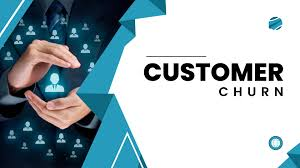

##About Customer Churn

Customer churn analysis is the process of understanding why customers stop using a business's product or service. It's a crucial activity for businesses to improve retention and reduce customer attrition. By analyzing churn data, businesses can identify factors that contribute to customer departure and take proactive measures to address these issues, ultimately leading to improved customer satisfaction and loyalty

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [20]:
# check the datat ypes
df.dtypes

,0
SeniorCitizen,int64
tenure,int64
MonthlyCharges,float64
TotalCharges,float64
Churn,int64
gender_Male,bool
Partner_Yes,bool
Dependents_Yes,bool
PhoneService_Yes,bool
MultipleLines_No phone service,bool


In [18]:
# Statistical Summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [3]:
# Data preprocessing
# Convert TotalCharges to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [4]:
# Fill missing TotalCharges with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [5]:
# Drop any remaining rows with missing values (if any)
df = df.dropna()

In [6]:
# Encode target variable
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [7]:
# Drop customerID since it's not a predictive feature
df = df.drop(columns=['customerID'])

In [8]:
# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [21]:
# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [9]:
# Split dataset into features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Model training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Predictions
y_pred = clf.predict(X_test)

In [13]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



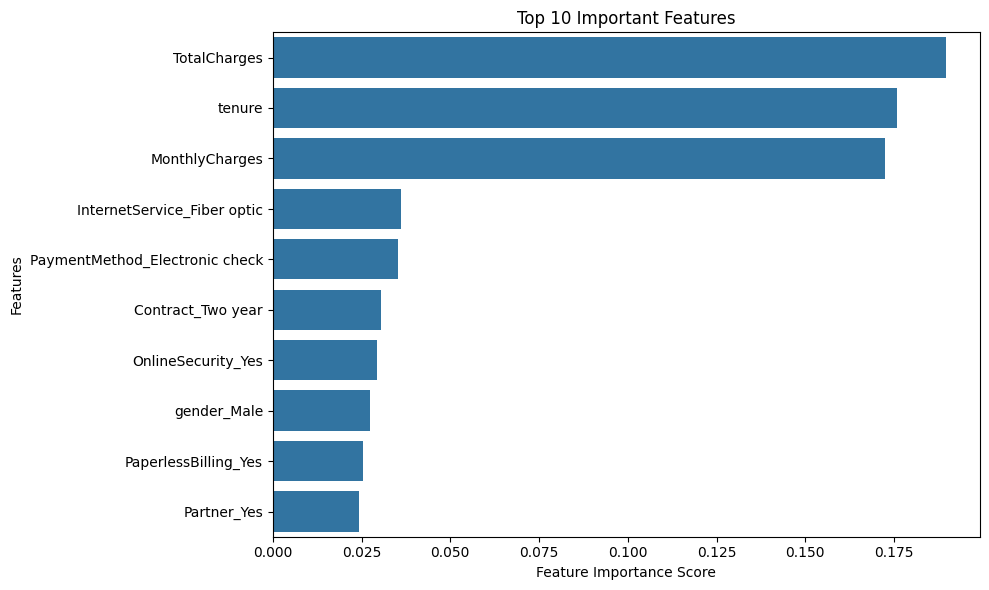

In [14]:
# Feature Importance Plot
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10])
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


#🧠 Approach:
##Data Preprocessing:

* Convert categorical data using One-Hot Encoding.

* Clean missing values and ensure data consistency.

##EDA (Exploratory Data Analysis):

* Understand customer demographics, services subscribed, and billing behavior.

##Modeling:

* Use a Random Forest Classifier for prediction.

* Split dataset into train/test and evaluate performance using classification metrics.

##Feature Importance:

* Identify what factors contribute most to churn.

#📊 Insights:
* Customers with monthly contracts and higher charges are more likely to churn.

* Longer tenure correlates with lower churn probability.

* Customer service and billing clarity are critical retention levers.

#🛠️ Skills & Tools Used:
* Python, Pandas, Scikit-learn

* Matplotlib, Seaborn

* Classification Modeling, Feature Engineering

* Data Cleaning, EDA

Approach: Leveraged advanced data preprocessing, feature engineering, and one-hot encoding on telecom churn data, followed by robust classification using a RandomForest model optimized with train/test split for predictive accuracy.

Insight: Identified key churn predictors through feature importance analysis, enabling data-driven retention strategies and enhancing model interpretability for actionable business outcomes.